# Show Group A & Group B on a boxplot

Mean Differnce between Page A and Page B: 0.3566666666666669


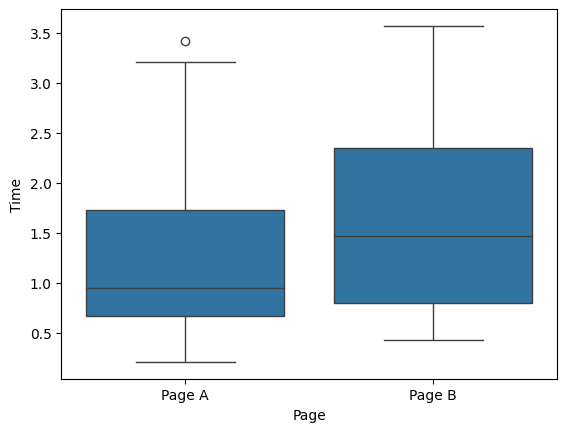

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

page_df = pd.read_csv("../data/web_page_data.csv")

sns.boxplot(x=page_df['Page'], y=page_df['Time'])

observation_diff = page_df[page_df['Page'] =='Page B']['Time'].mean() - page_df[page_df['Page'] =='Page A']['Time'].mean()

print("Mean Differnce between Page A and Page B:", observation_diff)
plt.show()

# Permutation Test the data.

p-value: 0.156
If p-value > 0.05, don't reject the null hypothesis.


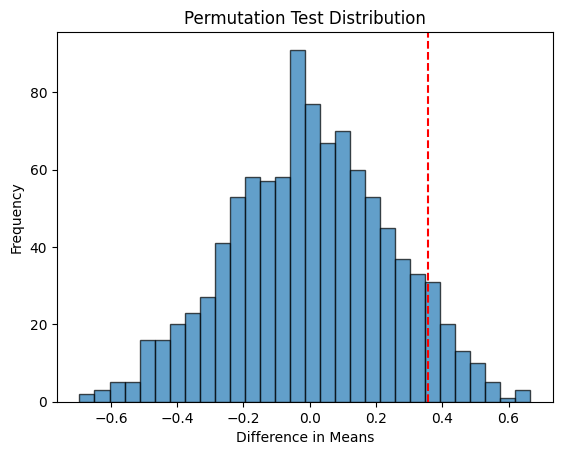

In [21]:
R = 1000

permutation_diffs = []
for _ in range(1000):
    # Shuffle the combined data
    shuffled = np.random.permutation(page_df['Time'])

    # Split into two groups of the same size as original groups
    perm_a = shuffled[:len(page_df[page_df['Page'] =='Page A'])]
    perm_b = shuffled[len(page_df[page_df['Page'] =='Page B']):]
    # Compute the difference in means
    permutation_diffs.append(np.mean(perm_b) - np.mean(perm_a))

# Convert to a NumPy array for analysis
permutation_diffs = np.array(permutation_diffs)


print("p-value:", np.mean(np.abs(permutation_diffs) >= np.abs(observation_diff)))
print("If p-value > 0.05, don't reject the null hypothesis.")

plt.hist(permutation_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observation_diff, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Test Distribution')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()


# Run the following table in a resampling procedure

![Resampling Procedure Table](../images/ResamplingProcedureTable.png)


Observed difference: 0.0003675791182059275
p-value: 0.7
If p-value > 0.05, don't reject the null hypothesis.


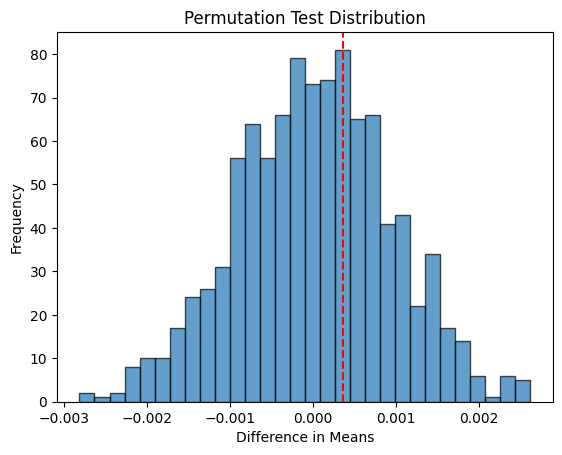

In [35]:
A1, B1, A2, B2 = 300, 182, 23739, 22588

# Combine data
group_A = np.array([1] * A1 + [0] * A2)  # 1 for successes in A, 0 for failures in A
group_B = np.array([1] * B1 + [0] * B2)  # 1 for successes in B, 0 for failures in B

# Combine all data
combined = np.concatenate((group_A, group_B))


R = 1000

permutation_diffs = []
for _ in range(1000):
    # Shuffle the combined data
    shuffled = np.random.permutation(combined)

    # Split into two groups of the same size as original groups
    sample_a = np.random.choice(shuffled, size=len(group_A), replace=True)  # With replacement
    sample_b = np.random.choice(shuffled, size=len(group_B), replace=True)  # With replacement

    # Compute the difference in means
    permutation_diffs.append(np.mean(sample_b) - np.mean(sample_a))

# Convert to a NumPy array for analysis
permutation_diffs = np.array(permutation_diffs)

observation_diff = 200/(200+23539) - 182/(182+22406)
print("Observed difference:", observation_diff)

print("p-value:", np.mean(np.abs(permutation_diffs) >= np.abs(observation_diff)))
print("If p-value > 0.05, don't reject the null hypothesis.")

plt.hist(permutation_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observation_diff, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Test Distribution')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()


# Find p-value with approximation method
We can do this because we have a binomial distribution (fail/no-fail), and eventually with enough trials a binomial distribution looks like a normal distribution.

In [31]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Data for the two groups
successes = np.array([200, 182])  # Number of successes in each group
totals = np.array([200+23739, 182+22588])  # Total observations in each group

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(successes, totals, alternative='larger')

print("Z-statistic:", z_stat)
print("p-value:", p_value)


Z-statistic: 0.4337185807649123
p-value: 0.3322464060498679


# Run t-test

In [36]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_value = ttest_ind(page_df[page_df['Page'] =='Page A']['Time'], page_df[page_df['Page'] =='Page B']['Time'])

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-statistic: -1.12, P-value: 0.2690


# ANOVA Permutation test (the one with replacement)

In [8]:
import numpy as np
from scipy.stats import f_oneway

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sessions_df = pd.read_csv("../data/four_sessions.csv")

# Calculate the observed F-statistic
page1 = sessions_df[sessions_df["Page"] == "Page 1"]['Time']
page2 = sessions_df[sessions_df["Page"] == "Page 2"]['Time']
page3 = sessions_df[sessions_df["Page"] == "Page 3"]['Time']
page4 = sessions_df[sessions_df["Page"] == "Page 4"]['Time']


observed_f, _ = f_oneway(page1, page2, page3, page4)

# Permutation test
n_permutations = 1000
permuted_f_statistics = []

for _ in range(n_permutations):
    # Shuffle the labels
    shuffled = np.random.permutation(sessions_df["Time"])
    
    # Split the data based on the shuffled labels
    sample_1 = np.random.choice(shuffled, size=len(page1), replace=True)  # With replacement
    sample_2 = np.random.choice(shuffled, size=len(page2), replace=True)  # With replacement
    sample_3 = np.random.choice(shuffled, size=len(page3), replace=True)  # With replacement
    sample_4 = np.random.choice(shuffled, size=len(page4), replace=True)  # With replacement
    
    # Compute the F-statistic for the permuted groups
    permuted_f, _ = f_oneway(sample_1, sample_2, sample_3, sample_4)
    permuted_f_statistics.append(permuted_f)

# Convert to numpy array
permuted_f_statistics = np.array(permuted_f_statistics)

# Calculate the p-value
p_value = np.mean(permuted_f_statistics >= observed_f)

print(f"Observed F-statistic: {observed_f}")
print(f"P-value from permutation test: {p_value}")


Observed F-statistic: 2.739825341901467
P-value from permutation test: 0.076


# F-statistic (multigroup t-statitic)

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('Time ~ C(Page)', data=sessions_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
print("p-value:", anova_table['PR(>F)'][0])

          sum_sq    df         F    PR(>F)
C(Page)    831.4   3.0  2.739825  0.077586
Residual  1618.4  16.0       NaN       NaN
p-value: 0.0775862152580148


/tmp/ipykernel_265584/3694734662.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("p-value:", anova_table['PR(>F)'][0])


# Chi-squared resampling algorithm

In [14]:
import numpy as np
from scipy.stats import chisquare

# Your observed data (example counts)
clicks = np.array([14, 8, 12])  # Replace with your data
even_distribution = np.sum(clicks)/len(clicks)
expected = np.array([even_distribution, even_distribution, even_distribution])  # Replace with expected values if known

# Simulate p-values
def simulate_p_value(observed, expected, n_simulations=2000):
    observed_stat, _ = chisquare(f_obs=observed, f_exp=expected)
    simulated_stats = []

    for _ in range(n_simulations):
        simulated_data = np.random.multinomial(np.sum(observed), expected / np.sum(expected))
        sim_stat, _ = chisquare(f_obs=simulated_data, f_exp=expected)
        simulated_stats.append(sim_stat)
    
    simulated_stats = np.array(simulated_stats)
    simulated_p_value = np.mean(simulated_stats >= observed_stat)
    
    return observed_stat, simulated_p_value

# Perform simulation
simulated_stat, simulated_p_value = simulate_p_value(clicks, expected, n_simulations=2000)

print(f"Observed Chi-squared Statistic: {simulated_stat}")
print(f"Simulated p-value: {simulated_p_value}")


Observed Chi-squared Statistic: 1.6470588235294115
Simulated p-value: 0.497


# Chi-squared

In [16]:
import numpy as np
from scipy.stats import chisquare

# Observed data
clicks = np.array([14, 8, 12])  # Replace with your data

# Expected frequencies (assuming equal distribution or other expected values)
even_distribution = np.sum(clicks)/len(clicks)
expected = np.array([even_distribution, even_distribution, even_distribution])  # Replace with expected values if known

# Normalize expected to match the sum of observed
expected = expected * (clicks.sum() / expected.sum())

# Perform the chi-squared test
observed_stat, p_value = chisquare(f_obs=clicks, f_exp=expected)

print(f"Observed Chi-squared Statistic: {observed_stat}")
print(f"Degrees of Freedom: {len(clicks) - 1}")
print(f"p-value: {p_value}")


Observed Chi-squared Statistic: 1.6470588235294115
Degrees of Freedom: 2
p-value: 0.438879929791555


# Fisher's Exact Test
(hard to get working, but resampling test is better anyway)

answer is supposed to be p-value = 0.4824

In [22]:
import numpy as np
from fisher import pvalue_nway

even_distribution = np.sum([14, 8, 12])/len([14, 8, 12])
# Example 2x2 contingency table
clicks = np.array([[14, 8, 12],  # Row 1
                   [even_distribution, even_distribution, even_distribution]])  # Row 2

# Perform Fisher's Exact Test for larger tables
_, p_value = pvalue_nway(clicks)

print(f"p-value: {p_value}")


ImportError: cannot import name 'pvalue_nway' from 'fisher' (/home/joshua/.local/lib/python3.10/site-packages/fisher/__init__.py)

# Find Sample size / Effect size /Significance level / Power
If you have three of these variables you can solve for the 4th one.

In [23]:
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Parameters
p1 = 0.55  # Proportion in group 1 (8/(8+72))
p2 = 0.50  # Proportion in group 2 (9/(9+61))
alpha = 0.05  # Significance level
power = 0.8  # Desired power

# Calculate the effect size (h)
effect_size = proportion_effectsize(p1, p2)

# Initialize the power analysis object
analysis = TTestIndPower()

# Calculate the required sample size per group
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required Sample Size per Group: {sample_size:.2f}")


Required Sample Size per Group: 1565.49
